<a href="https://colab.research.google.com/github/nandersonrodrigues/covid-19-brasil/blob/main/covid_19_brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#Projeto Covid-19 no Brasil


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime 

In [3]:
df = pd.read_csv("./drive/MyDrive/datasets/covid_19_data.csv", parse_dates=["ObservationDate", "Last Update"])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [4]:
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [5]:
import re

#corrigi nomes das colunas
def fix_column_name(col_name):
  return re.sub(r"[/| ]", "",col_name).lower()

In [6]:
df.columns = [fix_column_name(col_name) for col_name in df.columns]
df.columns

Index(['sno', 'observationdate', 'provincestate', 'countryregion',
       'lastupdate', 'confirmed', 'deaths', 'recovered'],
      dtype='object')

##Dados do Brasil

In [7]:
df_brasil = df.loc[
    (df.countryregion == "Brazil") &
    (df.confirmed >= 1)
]
df_brasil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2525,2526,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2631,2632,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2742,2743,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2852,2853,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2981,2982,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306272,306273,2021-05-29,Roraima,Brazil,2021-05-30 04:20:55,103222.0,1635.0,96188.0
306290,306291,2021-05-29,Santa Catarina,Brazil,2021-05-30 04:20:55,965277.0,15174.0,921496.0
306292,306293,2021-05-29,Sao Paulo,Brazil,2021-05-30 04:20:55,3254893.0,111123.0,2895697.0
306298,306299,2021-05-29,Sergipe,Brazil,2021-05-30 04:20:55,233932.0,5054.0,208146.0


In [8]:
df_brasil.observationdate.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   10209
unique                    459
top       2020-10-12 00:00:00
freq                       27
first     2020-02-26 00:00:00
last      2021-05-29 00:00:00
Name: observationdate, dtype: object

In [9]:
df_brasil.confirmed

2525            1.0
2631            1.0
2742            1.0
2852            2.0
2981            2.0
            ...    
306272     103222.0
306290     965277.0
306292    3254893.0
306298     233932.0
306342     177464.0
Name: confirmed, Length: 10209, dtype: float64

In [10]:
#agrupando o número de casos confirmados por média já que 1 data possui 
#vários dados de casos confirmados 
observationdate_confirmed = df_brasil.groupby('observationdate')['confirmed'].sum()
observationdate_confirmed

observationdate
2020-02-26           1.0
2020-02-27           1.0
2020-02-28           1.0
2020-02-29           2.0
2020-03-01           2.0
                 ...    
2021-05-25    16194209.0
2021-05-26    16274695.0
2021-05-27    16342162.0
2021-05-28    16391930.0
2021-05-29    16471600.0
Name: confirmed, Length: 459, dtype: float64

In [11]:
px.line(df_brasil, observationdate_confirmed.index, observationdate_confirmed.values, title="casos confirmados no brasil")

###casos confirmados por dia

In [12]:

df_brasil['novoscasos'] = list(map(
    lambda line: 0 if (line==0) else df_brasil['confirmed'].iloc[line] - df_brasil['confirmed'].iloc[line-1],
    np.arange(df_brasil.shape[0])
))  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
df_brasil['novoscasos']

2525            0.0
2631            0.0
2742            0.0
2852            1.0
2981            0.0
            ...    
306272    -125763.0
306290     862055.0
306292    2289616.0
306298   -3020961.0
306342     -56468.0
Name: novoscasos, Length: 10209, dtype: float64

In [14]:
observationdate_novoscasos = df_brasil.groupby('observationdate')['novoscasos'].sum()
observationdate_novoscasos

observationdate
2020-02-26       0.0
2020-02-27       0.0
2020-02-28       0.0
2020-02-29       1.0
2020-03-01       0.0
               ...  
2021-05-25     987.0
2021-05-26     735.0
2021-05-27     616.0
2021-05-28    1036.0
2021-05-29     663.0
Name: novoscasos, Length: 459, dtype: float64

In [15]:
#-270076.0 outlier
observationdate_novoscasos.replace(-270076.0, 167.0, inplace=True)

observationdate_novoscasos.loc[observationdate_novoscasos.index == '2020-05-20']

observationdate
2020-05-20    167.0
Name: novoscasos, dtype: float64

In [16]:
px.line(df_brasil, 
        x=observationdate_novoscasos.index, 
        y=observationdate_novoscasos.values, 
        title='Novos casos por dia')

###Número de mortes

In [17]:
df_brasil.deaths

2525           0.0
2631           0.0
2742           0.0
2852           0.0
2981           0.0
            ...   
306272      1635.0
306290     15174.0
306292    111123.0
306298      5054.0
306342      2852.0
Name: deaths, Length: 10209, dtype: float64

In [18]:
observationdate_deaths = df_brasil.groupby('observationdate')['deaths'].sum()
observationdate_deaths

observationdate
2020-02-26         0.0
2020-02-27         0.0
2020-02-28         0.0
2020-02-29         0.0
2020-03-01         0.0
                ...   
2021-05-25    452031.0
2021-05-26    454429.0
2021-05-27    456674.0
2021-05-28    459045.0
2021-05-29    461057.0
Name: deaths, Length: 459, dtype: float64

In [19]:
px.line(df_brasil, x=observationdate_deaths.index, y=observationdate_deaths.values, title='Mortes')

###Taxa de crescimento

In [20]:
def growth_rate(data, variable, start_date=None, end_date=None):

  if start_date == None:
    start_date = data.observationdate.loc[data[variable] > 0].min()
  else:
    start_date = pd.to_datetime(start_date)

  if end_date == None:
    end_date = data.observationdate.iloc[-1]
  else:
    end_date = pd.to_datetime(end_date)

  past = data.loc[data.observationdate == start_date, variable].values[0]
  present = data.loc[data.observationdate == end_date, variable].values[0]

  n = (end_date - start_date).days

  growth_rate = (present/past)**(1/n) - 1

  return growth_rate * 100

In [21]:
growth_rate(df_brasil, 'confirmed')

2.5017409860536244

###Taxa de crescimento diária

In [22]:
def daily_growth_rate(data, variable, start_date=None):

  if start_date == None:
    start_date = data.observationdate.loc[data[variable] > 0].min()
  else:
    start_date = pd.to_datetime(start_date)

  end_date = data.observationdate.max()

  n = (end_date - start_date).days

  rates = list(map(
      lambda line: (data[variable].iloc[line] - data[variable].iloc[line - 1]) / data[variable].iloc[line - 1],
      range(1, n+1)
  ))

  return np.array(rates) * 100

In [23]:

start_date = observationdate_confirmed.index.min()
end_date = observationdate_confirmed.index.max()

n = (end_date - start_date).days

rates = list(map(
      lambda line: (observationdate_confirmed.iloc[line] - observationdate_confirmed.iloc[line - 1]) / observationdate_confirmed.iloc[line - 1],
      range(1, n+1)
  ))

rate_day = np.array(rates) * 100


In [24]:
px.line(x=pd.date_range(start_date, end_date)[1:],
        y=rate_day, title="Taxa de crescimento de casos confirmados no Brasil")

##Predições

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [26]:


confirmed = observationdate_confirmed
confirmed.index = observationdate_confirmed.index
confirmed

observationdate
2020-02-26           1.0
2020-02-27           1.0
2020-02-28           1.0
2020-02-29           2.0
2020-03-01           2.0
                 ...    
2021-05-25    16194209.0
2021-05-26    16274695.0
2021-05-27    16342162.0
2021-05-28    16391930.0
2021-05-29    16471600.0
Name: confirmed, Length: 459, dtype: float64

In [27]:
res = seasonal_decompose(confirmed)

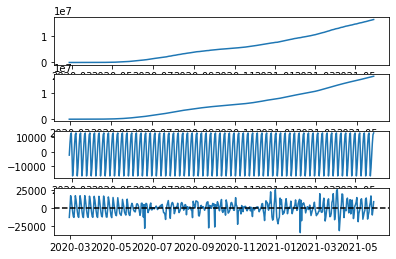

In [28]:
ax1 = plt.subplot(411)
ax2 = plt.subplot(412)
ax3 = plt.subplot(413)
ax4 = plt.subplot(414)

ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.plot(confirmed.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

###ARIMA

In [ ]:
!pip install pmdarima

In [30]:
from pmdarima.arima import auto_arima

model = auto_arima(confirmed)

In [31]:
fig = go.Figure(go.Scatter(
    x=confirmed.index,
    y=confirmed,
    name="Observados"
))

fig.add_trace(go.Scatter(
    x=confirmed.index,
    y=model.predict_in_sample(),
    name="Preditos"
))

fig.add_trace(go.Scatter(
    x=pd.date_range('2021-06-01', '2021-07-01'),
    y=model.predict(31),
    name="Forecast"
))

fig.update_layout(title='Previsão de casos confirmados no Brasil para os próximos 30 dias')
fig.show()

##Modelo de crescimento

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
#!conda install -c conda-forge fbprophet -y

!conda remove --force fbprophet
!pip install fbprophet

In [34]:
from fbprophet import Prophet

In [42]:
train = confirmed.reset_index()[:-5]
test = confirmed.reset_index()[-5:]

train.rename(columns={'observationdate': 'ds', 'confirmed': 'y'}, inplace=True)
test.rename(columns={'observationdate': 'ds', 'confirmed': 'y'}, inplace=True)

profeta = Prophet(growth='logistic', changepoints=['2020-03-21', '2020-03-30', '2020-04-25',
                                                   '2020-05-03', '2020-05-10',])

pop_brasil = 210147125 
train['cap'] = pop_brasil

profeta.fit(train)

future_dates = profeta.make_future_dataframe(periods=200)
future_dates['cap'] = pop_brasil
forecast = profeta.predict(future_dates)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=forecast.ds,
    y=forecast.yhat,
    name="Predição"
))

fig.add_trace(go.Scatter(
    x=train.ds,
    y=train.y,
    name="Observados - Treino"
))

fig.update_layout(title="Predições de casos confirmados no Brasil")
fig.show()